# Prophet - Predecir el valor de Bitcoin


Prophet es una de las librerías más avanzadas para predecir series temporales desarrollada por Facebook. Te enseñaremos a como entrenar un modelo con Prophet, a optimizarlo y a utilizarlo para realizar predicciones futuras. En este ejercicio vamos a practicar a predecir el valor de Bitcoin, una criptomoneda. Es la criptomoneda que le ha marcado el camino a todas las demás que llegaron después utilizando su tecnología.  

<hr/>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">
[Tip]: Para ejecutar el código de Python en la celda de código a continuación, haz clic en la celda para seleccionarla y presiona <kbd>Shift</kbd> + <kbd>Enter</kbd>.
</div>
<hr/>


In [2]:
#Dependencias de Prophet
!pip install pystan==2.19.1.1 --quiet
!pip install cmdstanpy --quiet
# Instalamos el modelo predictivo Prophet
!pip install fbprophet --quiet
# De aquí vamos a descargar los datos
!pip install yfinance --quiet

In [3]:
#Importamos las dependencias
import pandas as pd
import yfinance as yf
from datetime import datetime
from datetime import timedelta
import plotly.graph_objects as go
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly
import warnings

warnings.filterwarnings('ignore')

pd.options.display.float_format = '${:,.2f}'.format

<h3 id="version">Cargar histórico de datos</h3>


<p>
    Para descargarnos la serie temporal de BTC lo vamos a hacer desde Yahoo Finance. En concreto vamos a descargar el histórico desde 2016 hasta la actualidad.
</p>



In [4]:
# Fecha de inicio es un string 2016-01-01 y fecha de fin (hoy) en formato texto '%Y-%m-%d'
today = '2023-02-14'
start_date = '2016-01-01'
# Descargar el dataframe
btc_df = yf.download('BTC-USD',start_date, today).reset_index()

btc_df.tail()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
2596,2023-02-09,"$22,946.57","$22,996.44","$21,773.97","$21,819.04","$21,819.04",32572572185
2597,2023-02-10,"$21,819.01","$21,941.19","$21,539.39","$21,651.18","$21,651.18",27078406594
2598,2023-02-11,"$21,651.84","$21,891.41","$21,618.45","$21,870.88","$21,870.88",16356226232
2599,2023-02-12,"$21,870.90","$22,060.99","$21,682.83","$21,788.20","$21,788.20",17821046406
2600,2023-02-13,"$21,787.00","$21,898.41","$21,460.09","$21,808.10","$21,808.10",23918742607


In [5]:
# Validamos que no hay datos vacíos
btc_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
# TAREA: Filtramos el dataframe para quedarnos solo las columnas "Date" y "Open"
# Date será la fecha del valor y Open el valor del BTC en ese momento
df = btc_df[['Date','Open']]

# Valores que espera el prophet
# Eje X: Indíce llamado ds
# Eje Y: Serie a predecir llamada y
new_names = {
    "Date": "ds", 
    "Open": "y",
}

# Los renombramos con los nuevos nombres
df.rename(columns=new_names, inplace=True)
df['ds'] = df['ds'].dt.tz_localize(None)

In [7]:
df.tail()

,ds,y
2596,2023-02-09,"$22,946.57"
2597,2023-02-10,"$21,819.01"
2598,2023-02-11,"$21,651.84"
2599,2023-02-12,"$21,870.90"
2600,2023-02-13,"$21,787.00"


In [8]:
# Crear la gráfica del precio de apertura

x = df["ds"]
y = df["y"]

fig = go.Figure()

fig.add_trace(go.Scatter(x=x, y=y))

# Le ponemos el título
fig.update_layout(
    title_text="Serie temporal de Bitcoin Precio de Apertura",
)

fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list(
                [
                    dict(count=1, label="1m", step="month", stepmode="backward"),
                    dict(count=6, label="6m", step="month", stepmode="backward"),
                    dict(count=1, label="YTD", step="year", stepmode="todate"),
                    dict(count=1, label="1a", step="year", stepmode="backward"),
                    dict(step="all"),
                ]
            )
        ),
        rangeslider=dict(visible=True),
        type="date",
    )
)

<h3 id="version">Entrenar y predecir el modelo</h3>


<p>
    Inicializamos el Prophet y lo entramos pasandole el dataframe
</p>



Documentacion oficial de Prophet [GitHub](https://facebook.github.io/prophet/docs/quick_start.html)

In [9]:
#TAREA: Inicializa Prophet en la variable m con seasonality_mode en modo "multiplicative"
m = Prophet(seasonality_mode='multiplicative')


In [10]:
#TAREA: Entrena el modelo m con el dataframe de datos df

m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<p>
    Le decimos al modelo m los días en futuro que queremos predecir, en este caso el próximo año.
</p>



In [11]:
# TAREA: generar un dataframe con los días que tenemos y los 365 días siguientes a hoy para predecirlo
# PISTA: puedes usar la función del prophet make_future_dataframe()

future = m.make_future_dataframe(periods=365)
future.tail()

,ds
2961,2024-02-09
2962,2024-02-10
2963,2024-02-11
2964,2024-02-12
2965,2024-02-13


In [ ]:
# En el caso que hayas elegido un valor o fondo tradicional, es decir, que no opere los fines
# de semana, descomenta la siguiente línea:

# future = future[ future['ds'].dt.dayofweek < 5 ] # Nos elimina los fines de semana de 'ds' para no predecirlos
future

,ds
0,2016-01-01
3,2016-01-04
4,2016-01-05
5,2016-01-06
6,2016-01-07
...,...
2859,2023-10-30
2860,2023-10-31
2861,2023-11-01
2862,2023-11-02


<p>
    Al modelo entrenado le pasamos el dataframe a predecir.
</p>



In [12]:
#Utiliza el modelo m para predecir el dataframe future
forecast = m.predict(future) 

In [13]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2961,2024-02-09,"$-17,442.96","$-37,764.82","$2,822.25"
2962,2024-02-10,"$-17,707.66","$-37,456.17","$3,712.95"
2963,2024-02-11,"$-17,969.43","$-37,938.28","$3,593.59"
2964,2024-02-12,"$-18,216.29","$-38,621.88","$3,267.63"
2965,2024-02-13,"$-18,434.78","$-39,156.63","$3,390.04"


In [14]:
next_day = (datetime.today() + timedelta(days=1)).strftime('%Y-%m-%d')

forecast[forecast['ds'] == next_day]['yhat'].item()

13479.61455119917

<p>
    Gráfica con el modelo entrenado y los valores de un año en futuro predecidos.
</p>



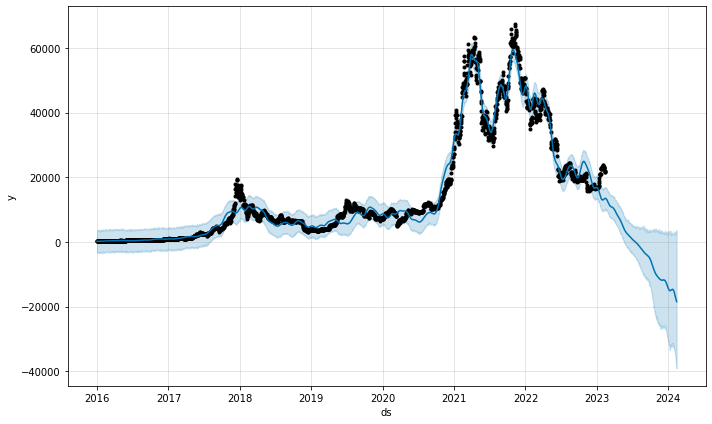

In [15]:
# plot_plotly(m, forecast)
fig1 = m.plot(forecast)


In [ ]:
plot_components_plotly(m, forecast)